# Classification of Taiwan Credit Card Payment Default Prediction




This notebook attempts to find the best classification algorithm to predict credit card payment defaults.

The data set is available in UCI repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
     
Classification algorithms used for model estimations are:

1. Perceptron
2. LogisticRegression
3. Decision Tree
4. Random Forest
5. K Nearest Neighbor
6. SVM
        
        
#### GOAL: Notebook should be able to conclude which particular model performs best for the given data set with justifications        

 ##### Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


##### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 

This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = 
the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 


X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 


X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



In [1]:
import pandas as panda

from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from matplotlib import pyplot as plot
import seaborn as sns


from numpy import bincount, linspace, mean, std, arange, squeeze

import itertools, time, datetime

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
remote_location = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"


In [3]:
def downLoadData():
    """
    
    Downloads the excel data from remote location. Reads one particular sheet, converts all columns names 
    to lower case and then returns the data
    
    """

    data = panda.read_excel(remote_location,sheet_name = "Data", header = 1)

    data.rename(str.lower, inplace = True, axis = 'columns')

    print(data.dtypes)

    return data

data = downLoadData()

id                            int64
limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default payment next month    int64
dtype: object


In [4]:
## check for varied data types. there may be alphabetical data types or numeric data written as string eg "4"".
## in such cases reformatting may be required
print(data.dtypes.value_counts()) ## all values are numeric and no formatting of data types are required in that case

int64    25
dtype: int64


In [5]:
data.shape

(30000, 25)

In [6]:

## since all fields are numeric we can get away with normal describe. else we would have required describe(include='all')
data.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000




There are simply 25 columns , all numeric values. No further feature selection or extraction may be required. We will go ahead and run algorithms deirectly and calculate accuracies.

However before we can do that we will check for class bias. Our target attribute is 'default payment next month', we will check for the value count for the same to see if our data sets is skewed towards one particular class. 

We can see there are almost 4times cases of non default versus default cases. Lets proceed with these analysis and check if we would require to account for class bias during model evaluation

Additionally, we would also drop the id column, since it adds no value other than row count


In [7]:
print(data['default payment next month'].value_counts())

data.drop(['id'], inplace=True, axis =1)

'id' not in data.columns.tolist()

0    23364
1     6636
Name: default payment next month, dtype: int64


True

We can see that they are almost 4 times as many non defaulters as there are defaulters. Hence there is a clear non uniform division in classes

This is important , since we now know that using accuracy score it self will not be important. We will have to use F1 score to estimate our models, since F1 score is a better indicator of classification models when there is a bias in target classes


In [8]:
## divide up our x and y axis

_y_target = data['default payment next month'].values

columns = data.columns.tolist()
columns.remove('default payment next month')

_x_attributes = data[columns].values


## meaning of stratify = _y_target. returns test and training data having the same proportions of class label '_y_target'
_x_train,_x_test,_y_train, _y_test = train_test_split(_x_attributes, _y_target, test_size =0.30, stratify = _y_target, random_state = 1)

## lets check the distribution. we can see 4times the lower value as was the case before as well. train/test set distributed well
print("label counts in y train %s" %bincount(_y_train))
print("label counts in y test %s" %bincount(_y_test))

label counts in y train [16355  4645]
label counts in y test [7009 1991]




We have completed out exploratory data analysis and here are our conclusions for the same:

1. Total number of data : 30000

2. Total number of features : 25

3. Target class has only two unique values and expects only two unique values. This would be a problem of binary classification

4. All our features are numeric data type and we will not be needed to deal with any non numeric categorical variables

5. There might be numeric categorical data however we are not performing any correlation/ ANOVA testing to decide on feature selections since the number of features is pretty small

6. Similarly considering the size of data we will not be performing any feature extraction as well.

7. Target classes are biased in their division of classes



The next steps would be to actually build out the model and compare metrics across all. In order to do so, we will take the following steps:


1. split your data into testing and training set

2. create a list of classifiers

3. create parameters for each of these classifiers. We will be using multiple possible parameters and let the alogrithm decide which is the best parameter providing the best score. eg for perceptron model, we will create 5-6 instances of learning rate and epoch values for parameter and model tuning

4. create a pipeline from step 1 and 2. StandardScaling would be done across all.

5. use gridsearch to perform parameter tuning for each model. Best parameters would be evaluated and we would be using the same parameters to predict values.

6. plot learning curve using the above gridsearch instance so that we can compare our mean testing and training accuracy values and check for bias/variance

7. Plot a bar chart for each model depicting f1 score, accuracy, training times, testing times.  P.S: since our scores are within 0 and 1 , we are going to normalize our time metrics as well using min max method. 

8. Additionally display confusion matrix for each model



In [9]:
class CodeTimer:
    
    """
        Utility custom contextual class for calculating the time 
        taken for a certain code block to execute
    
    """
    def __init__(self, name=None):
        self.name = " '"  + name + "'" if name else ''

    def __enter__(self):
        self.start = time.clock()

    def __exit__(self, exc_type, exc_value, traceback):
        self.took = (time.clock() - self.start) * 1000.0
        time_taken = datetime.timedelta(milliseconds = self.took)
        print('Code block' + self.name + ' took(HH:MM:SS): ' + str(time_taken))

In [10]:
## cv is essentially value of K in k fold cross validation
    
## n_jobs = 1 is  non parallel execution    , -1 is all parallel , any other number say 2 means execute in 2 cpu cores

def plotLearningCurve(_x_train, _y_train, learning_model_pipeline,  k_fold = 10, training_sample_sizes = linspace(0.1,1.0,10), jobsInParallel = 1):
    
    training_size, training_score, testing_score = learning_curve(estimator = learning_model_pipeline, \
                                                                X = _x_train, \
                                                                y = _y_train, \
                                                                train_sizes = training_sample_sizes, \
                                                                cv = k_fold, \
                                                                n_jobs = jobsInParallel) 


    training_mean = mean(training_score, axis = 1)
    training_std_deviation = std(training_score, axis = 1)
    testing_std_deviation = std(testing_score, axis = 1)
    testing_mean = mean(testing_score, axis = 1 )

    ## we have got the estimator in this case the perceptron running in 10 fold validation with 
    ## equal division of sizes betwwen .1 and 1. After execution, we get the number of training sizes used, 
    ## the training scores for those sizes and the test scores for those sizes. we will plot a scatter plot 
    ## to see the accuracy results and check for bias vs variance

    # training_size : essentially 10 sets of say a1, a2, a3,,...a10 sizes (this comes from train_size parameter, here we have given linespace for equal distribution betwwen 0.1 and 1 for 10 such values)
    # training_score : training score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    # testing_score : testing score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    ## the mean and std deviation for each are calculated simply to show ranges in the graph

    plot.plot(training_size, training_mean, label= "Training Data", marker= '+', color = 'blue', markersize = 8)
    plot.fill_between(training_size, training_mean+ training_std_deviation, training_mean-training_std_deviation, color='blue', alpha =0.12 )

    plot.plot(training_size, testing_mean, label= "Testing/Validation Data", marker= '*', color = 'green', markersize = 8)
    plot.fill_between(training_size, testing_mean+ training_std_deviation, testing_mean-training_std_deviation, color='green', alpha =0.14 )

    plot.title("Scoring of our training and testing data vs sample sizes")
    plot.xlabel("Number of Samples")
    plot.ylabel("Accuracy")
    plot.legend(loc= 'best')
    plot.show()

In [11]:
def runGridSearchAndPredict(pipeline, x_train, y_train, x_test, y_test, param_grid, n_jobs = 1, cv = 10, score = 'accuracy'):
    
    response = {}
    training_timer       = CodeTimer('training')
    testing_timer        = CodeTimer('testing')
    learning_curve_timer = CodeTimer('learning_curve')
    
    with training_timer:
        gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, n_jobs = n_jobs, scoring = score)

        search = gridsearch.fit(x_train,y_train)

        print("Grid Search Best parameters ", search.best_params_)
        print("Grid Search Best score ", search.best_score_)
            
    with testing_timer:
        y_prediction = gridsearch.predict(x_test)
            
    print("Accuracy score %s" %accuracy_score(y_test,y_prediction))
    print("Classification report  \n %s" %(classification_report(y_test, y_prediction)))
    
    with learning_curve_timer:
        plotLearningCurve(_x_train, _y_train, search.best_estimator_)
    
    response['learning_curve_time'] = learning_curve_timer.took
    response['testing_time'] = testing_timer.took
    response['_y_prediction'] = y_prediction
    response['accuracy_score'] = accuracy_score(y_test,y_prediction)
    response['training_time'] = training_timer.took
    response['f1_score']  = f1_score(y_test, y_prediction)
    
    return response
    

In [12]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.ylabel('True label')
    plot.xlabel('Predicted label')
#     plot.tight_layout()
    plot.show()

We will create a list of classifiers and compare performance. The algorithms selected for classification are as below:

1. Perceptron
2. SVM
3. Logistic Regression
4. SVM Kernel RBF
5. DecisionTrees
5. RandomForest
6. Nearest Neighbour




In [13]:
classifiers = [
    Perceptron(random_state = 1),
    LogisticRegression(random_state = 1),
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
    SVC(random_state = 1, kernel = 'rbf'),    
]


classifier_names = [
            'perceptron',
            'logisticregression',
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'svc',               
    
]

classifier_param_grid = [
            
            {'perceptron__max_iter': [1,5,8,10], 'perceptron__eta0': [0.5,.4, .2, .1]},
            {'logisticregression__C':[100,200,300,50,20,600]},
            {'decisiontreeclassifier__max_depth':[2,4,6,10,20]},
            {'randomforestclassifier__n_estimators':[2,4,6,10,20]} ,
            {'kneighborsclassifier__n_neighbors':[2,4,6,10,20]},
            {'svc__C':[1], 'svc__gamma':[0.01]},
    
]


    

Grid Search Best parameters  {'perceptron__eta0': 0.5, 'perceptron__max_iter': 8}
Grid Search Best score  0.4342291772465281
Code block 'training' took(HH:MM:SS): 0:00:14.932926
Code block 'testing' took(HH:MM:SS): 0:00:00.006456
Accuracy score 0.5882222222222222
Classification report  
              precision    recall  f1-score   support

          0       0.78      0.66      0.71      7009
          1       0.22      0.35      0.27      1991

avg / total       0.66      0.59      0.62      9000



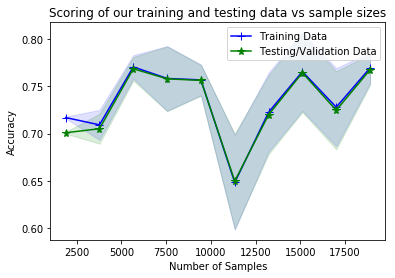

Code block 'learning_curve' took(HH:MM:SS): 0:00:05.588895
Grid Search Best parameters  {'logisticregression__C': 100}
Grid Search Best score  0.36182303543487687
Code block 'training' took(HH:MM:SS): 0:00:21.398088
Code block 'testing' took(HH:MM:SS): 0:00:00.006529
Accuracy score 0.811
Classification report  
              precision    recall  f1-score   support

          0       0.82      0.97      0.89      7009
          1       0.71      0.25      0.37      1991

avg / total       0.80      0.81      0.77      9000



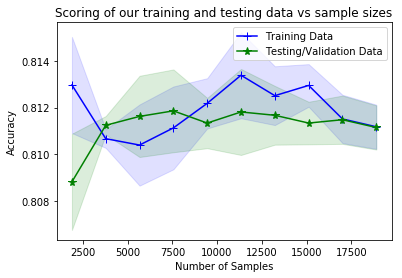

Code block 'learning_curve' took(HH:MM:SS): 0:00:17.878751
Grid Search Best parameters  {'decisiontreeclassifier__max_depth': 6}
Grid Search Best score  0.4726402406888405
Code block 'training' took(HH:MM:SS): 0:00:23.112180
Code block 'testing' took(HH:MM:SS): 0:00:00.007942
Accuracy score 0.8113333333333334
Classification report  
              precision    recall  f1-score   support

          0       0.84      0.94      0.89      7009
          1       0.63      0.36      0.46      1991

avg / total       0.79      0.81      0.79      9000



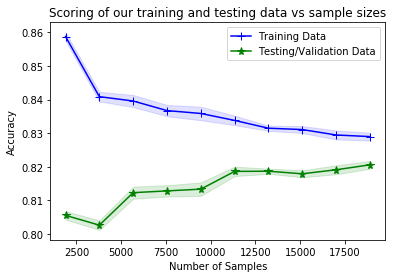

Code block 'learning_curve' took(HH:MM:SS): 0:00:20.087668
Grid Search Best parameters  {'randomforestclassifier__n_estimators': 20}
Grid Search Best score  0.45265731429800576
Code block 'training' took(HH:MM:SS): 0:00:52.112318
Code block 'testing' took(HH:MM:SS): 0:00:00.088744
Accuracy score 0.8113333333333334
Classification report  
              precision    recall  f1-score   support

          0       0.84      0.94      0.89      7009
          1       0.63      0.35      0.45      1991

avg / total       0.79      0.81      0.79      9000



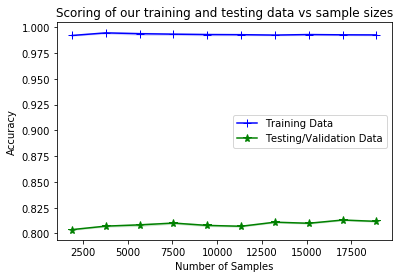

Code block 'learning_curve' took(HH:MM:SS): 0:01:58.423922
Grid Search Best parameters  {'kneighborsclassifier__n_neighbors': 20}
Grid Search Best score  0.4065700709861751
Code block 'training' took(HH:MM:SS): 0:25:21.535585
Code block 'testing' took(HH:MM:SS): 0:00:16.828580
Accuracy score 0.8134444444444444
Classification report  
              precision    recall  f1-score   support

          0       0.83      0.95      0.89      7009
          1       0.66      0.32      0.43      1991

avg / total       0.79      0.81      0.79      9000



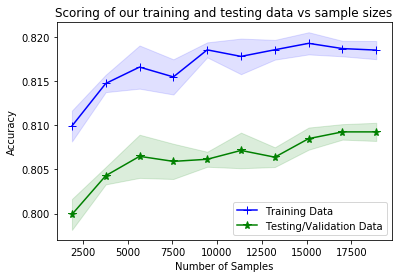

Code block 'learning_curve' took(HH:MM:SS): 0:23:19.797621
Grid Search Best parameters  {'svc__C': 1, 'svc__gamma': 0.01}
Grid Search Best score  0.4443066328723951
Code block 'training' took(HH:MM:SS): 0:06:46.601439
Code block 'testing' took(HH:MM:SS): 0:00:06.322666
Accuracy score 0.8172222222222222
Classification report  
              precision    recall  f1-score   support

          0       0.83      0.96      0.89      7009
          1       0.68      0.33      0.44      1991

avg / total       0.80      0.82      0.79      9000



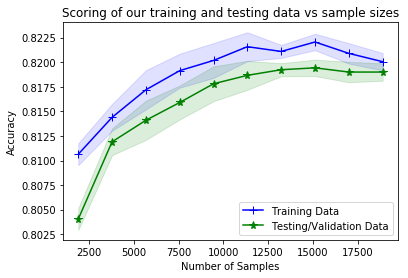

Code block 'learning_curve' took(HH:MM:SS): 1:29:41.506342
Code block 'overalltime' took(HH:MM:SS): 2:30:06.401798
9006401.797686333


In [14]:

timer = CodeTimer(name='overalltime')
model_metrics = {}

with timer:
    for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):

        pipeline = Pipeline([
                ('scaler', StandardScaler()),
                (model_name, model)
        ])

        result = runGridSearchAndPredict(pipeline, _x_train, _y_train, _x_test, _y_test, model_param_grid , score = 'f1')

        _y_prediction = result['_y_prediction']

        _matrix = confusion_matrix(y_true = _y_test ,y_pred = _y_prediction)

        model_metrics[model_name] = {}
        model_metrics[model_name]['confusion_matrix'] = _matrix
        model_metrics[model_name]['training_time'] = result['training_time']
        model_metrics[model_name]['testing_time'] = result['testing_time']
        model_metrics[model_name]['learning_curve_time'] = result['learning_curve_time']
        model_metrics[model_name]['accuracy_score'] = result['accuracy_score']
        model_metrics[model_name]['f1_score'] = result['f1_score']
        
        
print(timer.took)

In [15]:


model_estimates = panda.DataFrame(model_metrics).transpose()

                       accuracy_score             confusion_matrix  f1_score  \
perceptron                   0.588222  [[4595, 2414], [1292, 699]]  0.273903   
logisticregression              0.811   [[6810, 199], [1502, 489]]  0.365062   
decisiontreeclassifier       0.811333   [[6585, 424], [1274, 717]]  0.457854   
randomforestclassifier       0.811333   [[6602, 407], [1291, 700]]  0.451904   
kneighborsclassifier         0.813444   [[6692, 317], [1362, 629]]  0.428328   
svc                          0.817222   [[6705, 304], [1341, 650]]  0.441426   

                        learning_curve_time  testing_time  training_time  
perceptron                         0.000000      0.000000       0.000000  
logisticregression                 0.002286      0.000004       0.004291  
decisiontreeclassifier             0.002697      0.000088       0.005429  
randomforestclassifier             0.020989      0.004892       0.024678  
kneighborsclassifier               0.259343      1.000000       

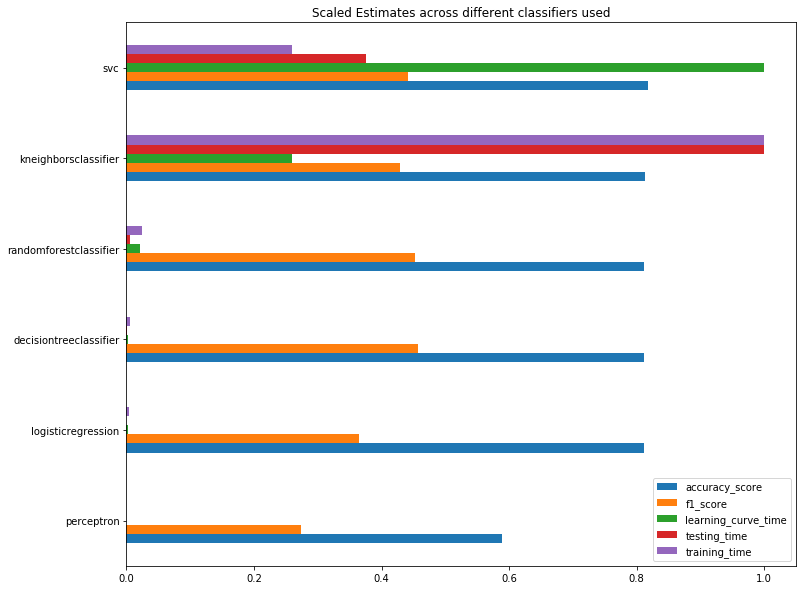

In [16]:

## convert model_metrics into panda data frame
## print out across model estimations and accuracy score bar chart


model_estimates['learning_curve_time'] = model_estimates['learning_curve_time'].astype('float64')
model_estimates['testing_time'] = model_estimates['testing_time'].astype('float64')
model_estimates['training_time'] = model_estimates['training_time'].astype('float64')
model_estimates['f1_score'] = model_estimates['f1_score'].astype('float64')

#scaling time parameters between 0 and 1
model_estimates['learning_curve_time'] = (model_estimates['learning_curve_time']- model_estimates['learning_curve_time'].min())/(model_estimates['learning_curve_time'].max()- model_estimates['learning_curve_time'].min())
model_estimates['testing_time'] = (model_estimates['testing_time']- model_estimates['testing_time'].min())/(model_estimates['testing_time'].max()- model_estimates['testing_time'].min())
model_estimates['training_time'] = (model_estimates['training_time']- model_estimates['training_time'].min())/(model_estimates['training_time'].max()- model_estimates['training_time'].min())

print(model_estimates)
model_estimates.plot(kind='barh',figsize=(12, 10))
plot.title("Scaled Estimates across different classifiers used")
plot.show()

Confusion matrix, without normalization
[[4595 2414]
 [1292  699]]


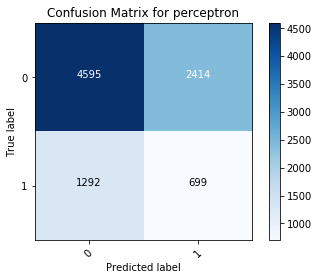

Confusion matrix, without normalization
[[6810  199]
 [1502  489]]


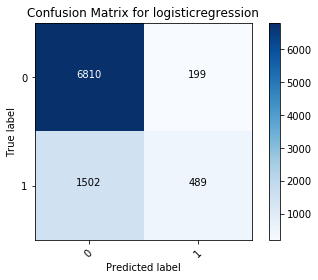

Confusion matrix, without normalization
[[6585  424]
 [1274  717]]


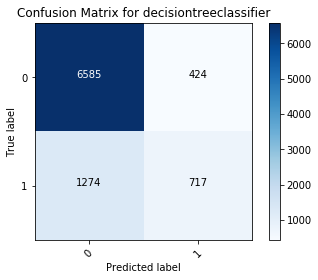

Confusion matrix, without normalization
[[6602  407]
 [1291  700]]


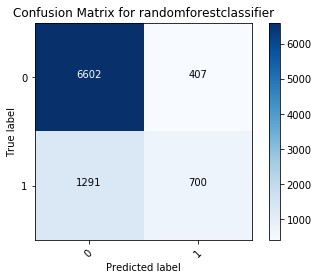

Confusion matrix, without normalization
[[6692  317]
 [1362  629]]


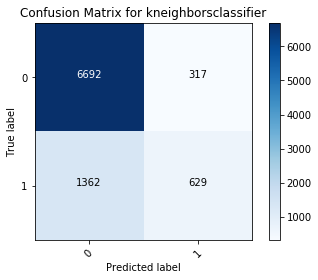

Confusion matrix, without normalization
[[6705  304]
 [1341  650]]


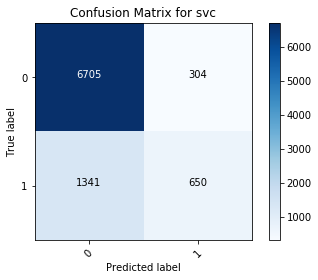

In [17]:

for i , j in enumerate(model_metrics):
    
    _matrix = model_metrics[j]['confusion_matrix']
    plot_confusion_matrix(_matrix, classes = [0,1], title = 'Confusion Matrix for %s'%j)
    
    


###### Findings so far:


1. Perceptron model performed the worst, the accuracy and f1 scores both are very low. We can ignore perceptron model

2. Logistic Regression performs better than perceptron with higher f1 score.

3. SVM, K Nearest Neighbor, RandomForests all have pretty high f1 score. However their testing and training times are pretty high as well.

4. If we look at the training vs testing curve for Nearest Neighbor and RandomForests, we see that there is a high variance. We can simply go ahead and ignore the models.

5. SVM learning curve shows that at high number of samples, our training and testing data performs well. However, SVM has a very high training and testing time and F1 score is also pretty much comparable with the scores for DecisionTreeClassifier


6. Based on our analysis above, we will select DecisionTreeClassifier as our model. The best parameters for the tree classifier is max depth of 6


### Conclusion

Based on our datasets, the model selected for best performance would be Decision Tree with a max depth of 6